#  0. Import python module 

In [1]:
%matplotlib inline

from sklearn.linear_model import LinearRegression
import sklearn.metrics
import sklearn.linear_model
import pandas
import numpy
import datetime
import matplotlib.pyplot
import matplotlib.dates
import math

In [2]:
filename = "./data/synthetic_tree_apple_number.csv"
df_synthetic = pandas.read_csv(filename)
df_synthetic

,Unnamed: 0,basename,number_apple_point,number_of_apple
0,0,synthetic_75,25722,87
1,1,synthetic_107,27551,554
2,2,synthetic_23,10123,39
3,3,synthetic_45,17660,212
4,4,synthetic_20,20935,105
...,...,...,...,...
234,234,synthetic_22,16945,135
235,235,synthetic_159,19052,116
236,236,synthetic_35,16803,77
237,237,synthetic_151,37894,668


In [3]:
matplotlib.pyplot.rcParams["figure.figsize"] = (15, 15)
camp = matplotlib.pyplot.get_cmap('hsv', 20)

def plot_R2_linear_model(axis, df_colum_1, df_colum_2, color='r'):

    X = numpy.array([df_colum_1.to_numpy()]).T
    y = df_colum_2.to_numpy()
    
    axis.plot(X, y, c=color, marker='.', linestyle='')
    
    reg = sklearn.linear_model.LinearRegression(fit_intercept=True).fit(X, y)
    axis.plot(X, reg.predict(X), 'b--', label="R² = {0:.2f}".format(reg.score(X, y)))
    
    reg = sklearn.linear_model.LinearRegression(fit_intercept=False).fit(X, y)
    axis.plot(X, reg.predict(X), 'k--', label="R² = {0:.2f}".format(reg.score(X, y)))
    
    handles, labels = axis.get_legend_handles_labels()
    axis.legend(handles, labels)
    
    axis.set_xlabel(df_colum_1.name)
    axis.set_ylabel(df_colum_2.name)

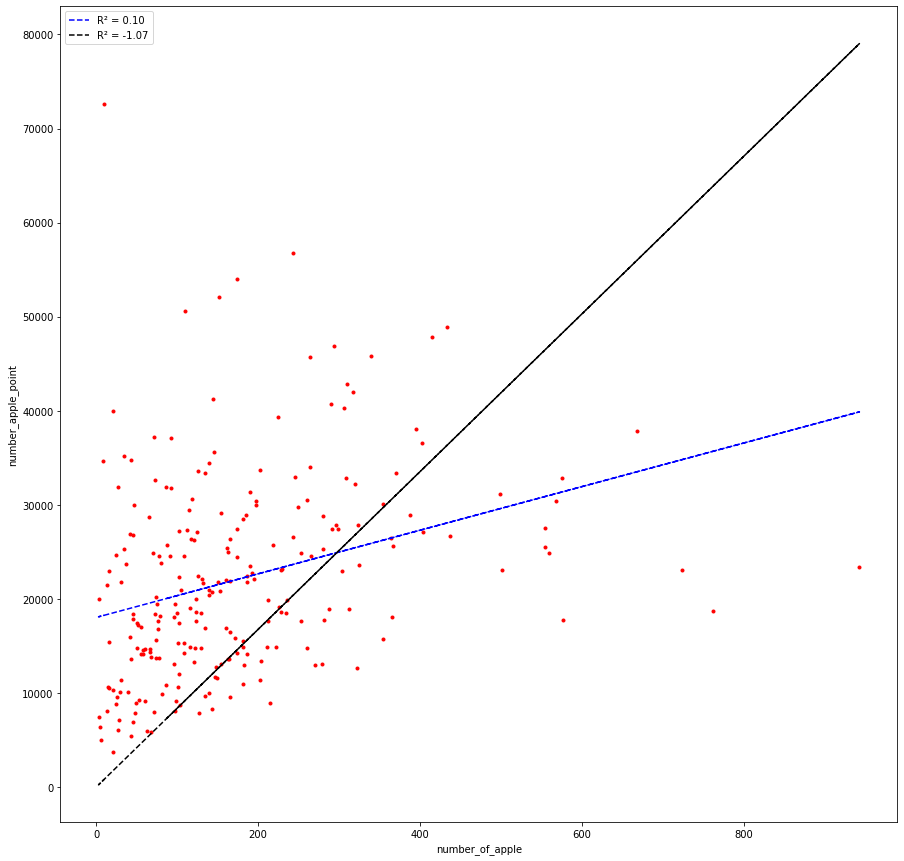

In [4]:
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(1, 1, 1)
plot_R2_linear_model(ax, df_synthetic['number_of_apple'], df_synthetic['number_apple_point'])

In [9]:
filename = "./synthetic_measurements_RF_DBSCAN.csv"
df_measurement_synthetic = pandas.read_csv(filename)
df_measurement_synthetic["basename"] = df_measurement_synthetic["basename"].str[:-4]
df_measurement_synthetic

,basename,date,line,position,nb_fruit
0,synthetic_162,etic_162.t,NaN,NaN,27
1,synthetic_57,etic_57.tx,NaN,NaN,8
2,synthetic_235,etic_235.t,NaN,NaN,45
3,synthetic_225,etic_225.t,NaN,NaN,29
4,synthetic_228,etic_228.t,NaN,NaN,24
...,...,...,...,...,...
234,synthetic_219,etic_219.t,NaN,NaN,33
235,synthetic_200,etic_200.t,NaN,NaN,26
236,synthetic_196,etic_196.t,NaN,NaN,15
237,synthetic_125,etic_125.t,NaN,NaN,8


In [10]:
df_comparison = pandas.merge(df_measurement_synthetic, 
                             df_synthetic)
df_comparison

,basename,date,line,position,nb_fruit,Unnamed: 0,number_apple_point,number_of_apple
0,synthetic_162,etic_162.t,NaN,NaN,27,209,16908,161
1,synthetic_57,etic_57.tx,NaN,NaN,8,96,31932,86
2,synthetic_235,etic_235.t,NaN,NaN,45,19,14771,122
3,synthetic_225,etic_225.t,NaN,NaN,29,218,14907,211
4,synthetic_228,etic_228.t,NaN,NaN,24,203,12806,148
...,...,...,...,...,...,...,...,...
234,synthetic_219,etic_219.t,NaN,NaN,33,201,25425,162
235,synthetic_200,etic_200.t,NaN,NaN,26,213,14873,116
236,synthetic_196,etic_196.t,NaN,NaN,15,171,8757,104
237,synthetic_125,etic_125.t,NaN,NaN,8,92,50623,110


In [11]:
matplotlib.pyplot.rcParams["figure.figsize"] = (15, 15)
camp = matplotlib.pyplot.get_cmap('hsv', 20)

def plot_R2_linear_model(axis, df_colum_1, df_colum_2, color='r'):

    X = numpy.array([df_colum_1.to_numpy()]).T
    y = df_colum_2.to_numpy()
    
    axis.plot(X, y, c=color, marker='.', linestyle='', markersize=20)
    
    reg = sklearn.linear_model.LinearRegression(fit_intercept=True).fit(X, y)
    # slope
    # inercept
    axis.plot(X, reg.predict(X), 'b--', label="R² = {0:.2f}".format(reg.score(X, y)))
    
    reg = sklearn.linear_model.LinearRegression(fit_intercept=False).fit(X, y)
    axis.plot(X, reg.predict(X), 'k--', label="R² = {0:.2f}".format(reg.score(X, y)))
    
    handles, labels = axis.get_legend_handles_labels()
    axis.legend(handles, labels, fontsize=40)
    
    axis.set_xlabel(df_colum_1.name, fontsize=40)
    axis.set_ylabel(df_colum_2.name, fontsize=40)


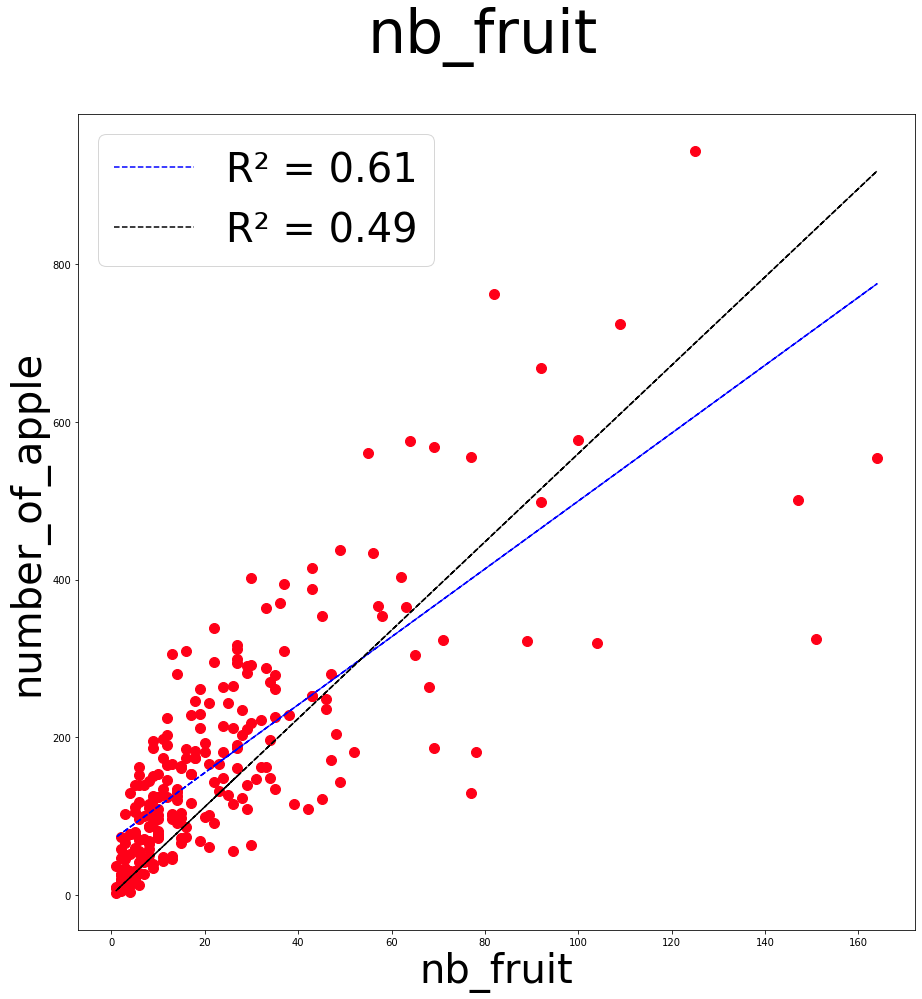

In [12]:
matplotlib.pyplot.rcParams["figure.figsize"] = (15, 15)

camp = matplotlib.pyplot.get_cmap('hsv', 1)
fig = matplotlib.pyplot.figure()
axis = matplotlib.pyplot.axes()
    
fig.suptitle('nb_fruit', fontsize=60)
plot_R2_linear_model(axis,
                        df_comparison['nb_fruit'],
                        df_comparison['number_of_apple'], 
                        color=camp(0))

matplotlib.pyplot.savefig("save.png")
matplotlib.pyplot.show()